### Load lib

In [29]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

from collections import Counter;
# RF, Adaboost,GBDT, Extratree, Voting.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier;
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
#LR
from sklearn.linear_model import LogisticRegression;
#KNN
from sklearn.neighbors import KNeighborsClassifier;
#DT
from sklearn.tree import DecisionTreeClassifier;
#full nn?
from sklearn.neural_network import MLPClassifier
#svm
from sklearn.svm import SVC
# K折线 学习曲线 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep');


### Load data

In [3]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.shape

(891, 12)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train['Pclass'].unique()

array([3, 1, 2])

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train[['Age','Fare','SibSp','Fare']].corr()

,Age,Fare,SibSp,Fare
Age,1.000000,0.096067,-0.308247,0.096067
Fare,0.096067,1.000000,0.159651,1.000000
SibSp,-0.308247,0.159651,1.000000,0.159651
Fare,0.096067,1.000000,0.159651,1.000000


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# apply 输入函数对象，类似map，相当与批处理
train['Name_len']=train['Name'].apply(len);
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


### Cut and Qcut


都是把数值型的集合划分为离散的段.

cut默认按给定的值均匀划分。
qcut默认下，保证划分到每个段的个数相等，然后再去选取分段点;

用高斯分布来理解:

In [19]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [20]:
mu =10;
std = 1.5;
f1 = (std*(np.random.randn(1000,))+mu).tolist();
gaussian = pd.DataFrame({"f":f1})
gaussian.head()

,f
0,7.650985
1,12.509034
2,7.436448
3,12.681229
4,7.662605


/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


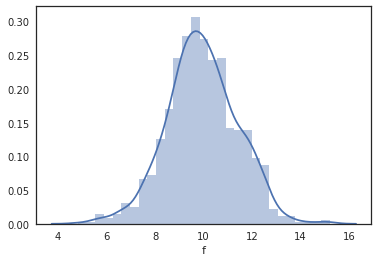

In [21]:
sns.distplot(gaussian['f'])

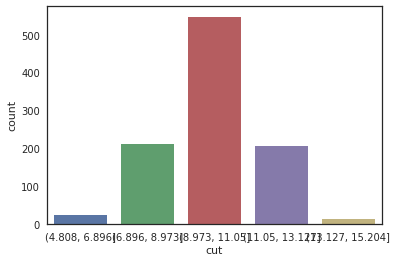

In [22]:
gaussian['cut'] = pd.cut(gaussian['f'],5)
sns.countplot(x="cut",data = gaussian);
splits = gaussian['cut'].unique().sort_values();
# sns.factorplot(x="cut", y = "f",data = gaussian, kind="bar");

#### Categorical


注意cut后的分段为一个pandas Categorical类，每个Categorical 包含了的段的类型是Interval

用`get_split_points`得到分段点,然后画到原来的图形上，展示分段效果

In [24]:
type(splits)

pandas.core.arrays.categorical.Categorical

In [25]:
type(splits[0])

pandas._libs.interval.Interval

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


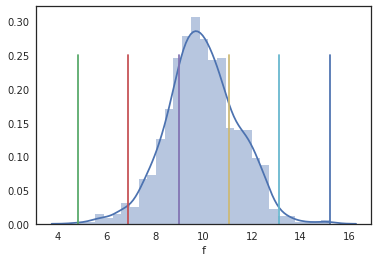

In [26]:
def get_split_points(sp):
    points = []
    for i,interval in enumerate(sp):
        points.append(interval.left);
        if i == len(sp)-1:
            points.append(interval.right)
    return points

l = get_split_points(splits)
# 用ax将seanborn的图画在一起a
fig, ax = plt.subplots()
sns.distplot(gaussian['f'],ax=ax);
maxi = 0.25;
lines=100;
for i in l:
    plt.plot([i]*lines, np.linspace(0, maxi, lines))
            

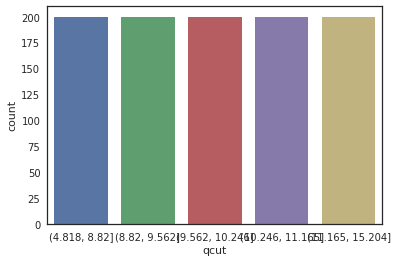

In [27]:
gaussian['qcut'] = pd.qcut(gaussian['f'],5)
sns.countplot(x="qcut",data = gaussian);
splits = gaussian['qcut'].unique().sort_values();

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


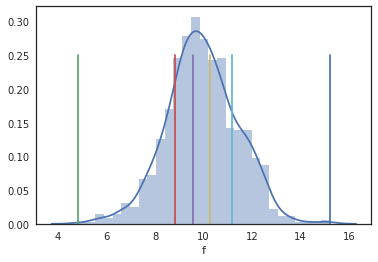

In [28]:
l = get_split_points(splits)
# 用ax将seanborn的图画在一起a
fig, ax = plt.subplots()
sns.distplot(gaussian['f'],ax=ax);
maxi = 0.25;
lines=100;
for i in l:
    plt.plot([i]*lines, np.linspace(0, maxi, lines))

#### 结论
可以明显看出qcut和cut区别，qcut为了保证每个段元素相等，在元素分布密集的中间区域，范围比较债，而在分布稀疏的边缘，范围比较宽，cut的则是均匀分布，每个区域内的元素个数不一样。

### Groupby

In [4]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],'key2':['one','two','one','two','one'],'data1':np.random.randn(5),'data2':np.random.randn(5)})  
df

,key1,key2,data1,data2
0,a,one,-1.116273,-0.990068
1,a,two,1.685549,0.506476
2,b,one,-0.321567,0.957115
3,b,two,1.190307,0.511386
4,a,one,-0.814202,0.310887


In [7]:
gp = df.groupby(['key1','key2']); gp

#### see group

In [9]:
gp.groups

{('a', 'one'): Int64Index([0, 4], dtype='int64'),
 ('a', 'two'): Int64Index([1], dtype='int64'),
 ('b', 'one'): Int64Index([2], dtype='int64'),
 ('b', 'two'): Int64Index([3], dtype='int64')}

#### show items in  groups 

In [10]:
for g in gp: print(g)

(('a', 'one'),   key1 key2     data1     data2
0    a  one -1.116273 -0.990068
4    a  one -0.814202  0.310887)
(('a', 'two'),   key1 key2     data1     data2
1    a  two  1.685549  0.506476)
(('b', 'one'),   key1 key2     data1     data2
2    b  one -0.321567  0.957115)
(('b', 'two'),   key1 key2     data1     data2
3    b  two  1.190307  0.511386)


#### staticis

In [11]:
gp.size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [12]:
gp.sum()

data1     data2
key1 key2                    
a    one  -1.930475 -0.679181
     two   1.685549  0.506476
b    one  -0.321567  0.957115
     two   1.190307  0.511386

In [13]:
gp.mean()

data1     data2
key1 key2                    
a    one  -0.965237 -0.339591
     two   1.685549  0.506476
b    one  -0.321567  0.957115
     two   1.190307  0.511386

#### app agg

agg some function

In [15]:
gp['data1'].agg('mean')

key1  key2
a     one    -0.965237
      two     1.685549
b     one    -0.321567
      two     1.190307
Name: data1, dtype: float64

apply self definition function

In [18]:
gp['data1'].apply( lambda x: x+1)

0   -0.116273
1    2.685549
2    0.678433
3    2.190307
4    0.185798
Name: data1, dtype: float64

### Pivot_table (透视表)

In [70]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                  "C": ["small", "large", "large", "small",
                       "small", "large", "small", "small",
                        "large"],
                 "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],  "E": [10, 82, 92, 35, 42, 15, 61, 27,43]})
df

,A,B,C,D,E
0,foo,one,small,1,10
1,foo,one,large,2,82
2,foo,one,large,2,92
3,foo,two,small,3,35
4,foo,two,small,3,42
5,bar,one,large,4,15
6,bar,one,small,5,61
7,bar,two,small,6,27
8,bar,two,large,7,43


In [56]:
df.dtypes

A    object
B    object
C    object
D     int64
dtype: object

`聚集函数`计算只和numeric的列有关 , 默认计算方式是 numpy.mean 可以通过aggfun来指定新的统计指标
index指定cat行，colums指定cat列

In [71]:
pd.pivot_table(df,index=['A'])

,D,E
A,,
bar,5.5,36.5
foo,2.2,52.2


margin 增加一行来统计行列的sum的信息

In [72]:
pd.pivot_table(df,index=['A'],margins=True)

,D,E
A,,
bar,5.500000,36.500000
foo,2.200000,52.200000
All,3.666667,45.222222


values指定被统计的numeric 列

In [74]:
pd.pivot_table(df,values=['D'],index=['A'],margins=True)

,D
A,
bar,5.500000
foo,2.200000
All,3.666667


index 和columns分别指定表的行和列
可以通过列名，分组，index等方式

In [82]:
pd.pivot_table(df,index=['A'],columns=['B'],margins=True)

D                          E                  
B         one   two       All        one    two        All
A                                                         
bar  4.500000  6.50  5.500000  38.000000  35.00  36.500000
foo  1.666667  3.00  2.200000  61.333333  38.50  52.200000
All  2.800000  4.75  3.666667  52.000000  36.75  45.222222

In [83]:
pd.pivot_table(df,index=range(0,9) )

,D,E
0,1,10
1,2,82
2,2,92
3,3,35
4,3,42
5,4,15
6,5,61
7,6,27
8,7,43


In [84]:
pd.pivot_table(df,index=['a','b','c','d','e','f','g','h','i'] )

,D,E
a,1,10
b,2,82
c,2,92
d,3,35
e,3,42
f,4,15
g,5,61
h,6,27
i,7,43


aggfun指定新的统计指标

In [102]:
def variance(a):
    return np.square (a- np.mean(a) ) / len(a)

In [103]:
pd.pivot_table(df,values=['D','E'],index=['A'],columns=['B'],aggfunc=deviration )

D        E    
B   one two  one two
A                   
bar   9  13   76  70
foo   5   6  184  77

### Crosstab

In [104]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                  "C": ["small", "large", "large", "small",
                       "small", "large", "small", "small",
                        "large"],
                 "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],  "E": [10, 82, 92, 35, 42, 15, 61, 27,43]})
df

,A,B,C,D,E
0,foo,one,small,1,10
1,foo,one,large,2,82
2,foo,one,large,2,92
3,foo,two,small,3,35
4,foo,two,small,3,42
5,bar,one,large,4,15
6,bar,one,small,5,61
7,bar,two,small,6,27
8,bar,two,large,7,43


统计不同数据间(crosstab的含义)，各类情况出现的频数，下例就是想看看A[ bar foo] 与B [ one two] 组合后4种情况出现的次数统计

这里就不区分num和cat了,反正是统计频率

In [106]:
pd.crosstab(index=df['A'],columns=df['B'])

B,one,two
A,,
bar,2,2
foo,3,2


也可以指定aggfun,但是只针对numeric数据，因此需要用value来指定
统计A,B各种组合下，D的累加的情况:

In [124]:
pd.crosstab(df.A,df.B,values=df['D'] ,aggfunc=np.sum)

B,one,two
A,,
bar,9,13
foo,5,6


重点看fast ai 里的movielen例子，是如何把数据拼接成最终想要的表的

###  KFold,stratifiedKFold,StratifiedShuffleSplit

都是用来生成**cross validation data**的

`KFold`是分成n坨，shuffle指的是拿做cv set 的那坨的顺序是随机的,若false,则按顺序抽一坨为cv set.  但不分层(即按分类的比例来构造每一坨), 
`StratifiedKFold`和KFold的区别是为分层，比如y中0和1为1:1,则分坨时，每坨0和1的比例也是1:1

以上两种属于`不放回抽样`，即每坨的元素都是不重复的，所以的坨加起来就是原来的集合


`ShuffleSplit` 和`StratifiedShuffleSplit` 则是`放回抽样`，同样分10次，每次都放回. 意味着可能10次的cv set里，元素可能重复

`train_and_test_split`
前面都是给出index，这个函数直接根据dataset给出分好的train set and cv set.不是
Fold算法，只给出一个train和1个test, 调用多次的效果类似于`ShuffleSplit`


In [30]:
splits = 5

tx = range(10)
ty = [0] * 5 + [1] * 5

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold,KFold,ShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn import datasets




print("KFold shuffle=false")
kFold = KFold(n_splits=splits, shuffle=False, random_state=42)
for train_index, test_index in kFold.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)
    
print("KFold shuffle=true")
kFold = KFold(n_splits=splits, shuffle=True, random_state=43)
for train_index, test_index in kFold.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)

print("StratifiedKFold shuffle =false")
stratifiedKFold = StratifiedKFold(n_splits=splits, shuffle=False, random_state=42)
for train_index, test_index in stratifiedKFold.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)
    
print("StratifiedKFold shuffle =true")
stratifiedKFold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
for train_index, test_index in stratifiedKFold.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)

print("Shuffle Split")
shuffleSplit = ShuffleSplit(n_splits=splits, random_state=42, test_size=2)
for train_index, test_index in shuffleSplit.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)
    
print("Stratified Shuffle Split")
stratifiedShuffleSplit = StratifiedShuffleSplit(n_splits=splits, random_state=42, test_size=2)
for train_index, test_index in stratifiedShuffleSplit.split(tx, ty):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    
print('train_test_split:')

X_train, X_vld, y_train,y_vld = train_test_split(tx,ty,train_size=0.8,shuffle=True)
print(X_train,y_train,X_vld,y_vld)


KFold shuffle=false
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
KFold shuffle=true
TRAIN: [0 1 2 4 5 6 7 8] TEST: [3 9]
TRAIN: [0 1 2 3 4 5 7 9] TEST: [6 8]
TRAIN: [0 1 3 4 6 7 8 9] TEST: [2 5]
TRAIN: [0 2 3 4 5 6 8 9] TEST: [1 7]
TRAIN: [1 2 3 5 6 7 8 9] TEST: [0 4]
StratifiedKFold shuffle =false
TRAIN: [1 2 3 4 6 7 8 9] TEST: [0 5]
TRAIN: [0 2 3 4 5 7 8 9] TEST: [1 6]
TRAIN: [0 1 3 4 5 6 8 9] TEST: [2 7]
TRAIN: [0 1 2 4 5 6 7 9] TEST: [3 8]
TRAIN: [0 1 2 3 5 6 7 8] TEST: [4 9]
StratifiedKFold shuffle =true
TRAIN: [0 2 3 4 5 7 8 9] TEST: [1 6]
TRAIN: [0 1 2 3 5 6 7 8] TEST: [4 9]
TRAIN: [0 1 3 4 5 6 8 9] TEST: [2 7]
TRAIN: [1 2 3 4 6 7 8 9] TEST: [0 5]
TRAIN: [0 1 2 4 5 6 7 9] TEST: [3 8]
Shuffle Split
TRAIN: [5 0 7 2 9 4 3 6] TEST: [8 1]
TRAIN: [8 5 3 4 7 9 6 2] TEST: [0 1]
TRAIN: [0 6 8 5 3 7 1 4] TEST: [9 2]
TRAIN: [6 2 8 0 3 4 5 9] TEST: [1 7

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### One-hot encoding using pandas or sklearn

[参考](https://blog.csdn.net/hshuihui/article/details/53259710)

category 怎么处理
数值型特征怎么处理.

目前比较熟悉的有pandas里的get_dummies做one-hot encoding.

sklearn里也有很多特征编码方法.

下面的例子是要把数值型或者字符型都用sklearn 来one-hot encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import * 
import numpy as np

dataset = pd.DataFrame({'pet': ['cat', 'dog', 'dog', 'fish'],                         
'age': [4 , 6, 3, 3],                        
'salary':[4, 5, 1, 1],
'lvl':[4, 5, pd.np.nan, 1]})

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import * 
import numpy as np

dataset = pd.DataFrame({'pet': ['cat', 'dog', 'dog', 'fish'],                         
'age': [4 , 6, 3, 3],                        
'salary':[4, 5, 1, 1],
'lvl':[4, 5, pd.np.nan, 1]})
dataset

,pet,age,salary,lvl
0,cat,4,4,4.0
1,dog,6,5,5.0
2,dog,3,1,NaN
3,fish,3,1,1.0


#### pandas get_dummies for one-hot encoding

In [33]:
d =  pd.get_dummies(dataset,columns=['age','salary','pet','lvl']);
d.head()

,age_3,age_4,age_6,salary_1,salary_4,salary_5,pet_cat,pet_dog,pet_fish,lvl_1.0,lvl_4.0,lvl_5.0
0,0,1,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,1,0,0


NaN也可以当做一类，如果需要的话

In [34]:
d =  pd.get_dummies(dataset,columns=['age','salary','pet','lvl'],dummy_na=True);
d.head()

,age_3.0,age_4.0,age_6.0,age_nan,salary_1.0,salary_4.0,salary_5.0,salary_nan,pet_cat,pet_dog,pet_fish,pet_nan,lvl_1.0,lvl_4.0,lvl_5.0,lvl_nan
0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


#### sklearn preprocessing for one-hot encoding

*  Nan不能处理
* 只能处理成np.array 

In [35]:
age= OneHotEncoder(sparse = False).fit_transform( dataset[['age']])
# pet= OneHotEncoder(sparse = False).fit_transform( dataset[['pet']])
salary= OneHotEncoder(sparse = False).fit_transform( dataset[['salary']])
# lvl = OneHotEncoder(sparse = False).fit_transform( dataset[['lvl']])
d = np.hstack( (age,salary));d

array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

LabelEncoder 针对字符型label. ['a','b','c']--->[0,1,2]
先LabelEncoder ,再OneHotEncoder才能达到最终的效果

In [36]:
numi_pet = LabelEncoder().fit_transform(dataset[['pet']])
print(numi_pet)
pet =  OneHotEncoder(sparse = False).fit_transform( numi_pet.reshape(-1,1))
pet

[0 1 1 2]


/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### DataFrameMapper in pandas_sklearn

这个东西来自`sklearn_pandas`的三方库

[参考](https://blog.csdn.net/hshuihui/article/details/53260922)
pandas处理dataframe, sklearn很多是以narray为输入.

DataFrameMapper来自sklearn_pandas，可以将sklearn 的 transformer灵活地运用在  DataFrame 当中

DataFrameMapper内部机制是先将指定的 DataFrame 的列转换成 ndarray 类型，再输入到 sklearn 的相应 transformer中

`DataFrameMapper就是提前定义好mapper,针对输入X的某些列，根据mapper做相应的数据变换`

对列的变换比较灵活，可筛选出一个或多个列，并用一个或多个 sklearn 的 transformer 作用，组合起来极其强大；同时通过继承机制，它本身也可以看做是 sklearn 的 transformer 类，输入 sklearn 的相关类(如Pipeline, FeatureUnion)

In [37]:
import random 
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn_pandas import DataFrameMapper, cross_val_score

In [38]:
dataset = pd.DataFrame({'pet': ['cat', 'dog', 'dog', 'fish'],                         
'age': [4 , 6, 3, 3],                        
'salary':[4, 5, 1, 1]});
dataset

,pet,age,salary
0,cat,4,4
1,dog,6,5
2,dog,3,1
3,fish,3,1


In [39]:
mapper = DataFrameMapper([        (['age'],[ MinMaxScaler(), StandardScaler()]),    ]) 
mapper.fit_transform(dataset)

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.35973996e-16],
       [ 1.63299316e+00],
       [-8.16496581e-01],
       [-8.16496581e-01]])

组合模式，这个就很方便了

In [40]:
mapper = DataFrameMapper([ ('pet', LabelBinarizer()),  (['age'], [MinMaxScaler()]) , (['salary'], OneHotEncoder())    ])
d = mapper.fit_transform(dataset)
d.shape # 7  = 3+ 1+ 3 

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(4, 7)

更厉害的,尺度归一化，PCA降维,生成二次项特征，都可以很简易的完成

In [47]:
from sklearn.decomposition import PCA
mapper = DataFrameMapper([        
    (['salary','age'], [MinMaxScaler(), PCA(2)]),     
      (['salary','age'],[MinMaxScaler(), PolynomialFeatures(2)]) 
           ]) 
mapper.fit_transform(dataset)

/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.23146041,  0.20995792,  1.        ,  0.75      ,  0.33333333,
         0.5625    ,  0.25      ,  0.11111111],
       [ 0.86453897, -0.11585794,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [-0.54799969, -0.04704999,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.54799969, -0.04704999,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])